# Extração dos dados do Enade


In [2]:
import pandas as pd
import numpy as np
import zipfile
import requests
from io import BytesIO
import os

In [3]:
os.makedirs('./enade2019', exist_ok = True)

In [4]:
url = 'https://download.inep.gov.br/microdados/Enade_Microdados/microdados_enade_2019.zip'    

In [5]:
file = BytesIO(requests.get(url).content)
zip = zipfile.ZipFile(file)
zip.extractall('./enade2019')

In [13]:
data = pd.read_csv('./enade2019/3.DADOS/microdados_enade_2019.txt',sep = ';', decimal = ',')

C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,84,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
data.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
0,2019,1,10002,10028,5710,3,1,5103403,51,5,...,2.0,5.0,1.0,1.0,2.0,5.0,8.0,7.0,1.0,2.0
1,2019,1,10002,10028,5710,3,1,5103403,51,5,...,1.0,4.0,2.0,2.0,2.0,5.0,4.0,4.0,2.0,2.0
2,2019,1,10002,10028,5710,3,1,5103403,51,5,...,3.0,4.0,4.0,3.0,3.0,4.0,1.0,1.0,1.0,4.0
3,2019,1,10002,10028,5710,3,1,5103403,51,5,...,3.0,5.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,3.0
4,2019,1,10002,10028,5710,3,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433930 entries, 0 to 433929
Columns: 137 entries, NU_ANO to QE_I68
dtypes: float64(2), int64(33), object(102)
memory usage: 453.6+ MB


In [17]:
dict(data.dtypes)

{'NU_ANO': dtype('int64'),
 'CO_IES': dtype('int64'),
 'CO_CATEGAD': dtype('int64'),
 'CO_ORGACAD': dtype('int64'),
 'CO_GRUPO': dtype('int64'),
 'CO_CURSO': dtype('int64'),
 'CO_MODALIDADE': dtype('int64'),
 'CO_MUNIC_CURSO': dtype('int64'),
 'CO_UF_CURSO': dtype('int64'),
 'CO_REGIAO_CURSO': dtype('int64'),
 'NU_IDADE': dtype('int64'),
 'TP_SEXO': dtype('O'),
 'ANO_FIM_EM': dtype('int64'),
 'ANO_IN_GRAD': dtype('float64'),
 'CO_TURNO_GRADUACAO': dtype('float64'),
 'TP_INSCRICAO_ADM': dtype('int64'),
 'TP_INSCRICAO': dtype('int64'),
 'NU_ITEM_OFG': dtype('int64'),
 'NU_ITEM_OFG_Z': dtype('int64'),
 'NU_ITEM_OFG_X': dtype('int64'),
 'NU_ITEM_OFG_N': dtype('int64'),
 'NU_ITEM_OCE': dtype('int64'),
 'NU_ITEM_OCE_Z': dtype('int64'),
 'NU_ITEM_OCE_X': dtype('int64'),
 'NU_ITEM_OCE_N': dtype('int64'),
 'DS_VT_GAB_OFG_ORIG': dtype('O'),
 'DS_VT_GAB_OFG_FIN': dtype('O'),
 'DS_VT_GAB_OCE_ORIG': dtype('O'),
 'DS_VT_GAB_OCE_FIN': dtype('O'),
 'DS_VT_ESC_OFG': dtype('O'),
 'DS_VT_ACE_OFG': dtype(

In [19]:
data.isnull().sum()

NU_ANO            0
CO_IES            0
CO_CATEGAD        0
CO_ORGACAD        0
CO_GRUPO          0
              ...  
QE_I64        26065
QE_I65        26064
QE_I66        26067
QE_I67        26064
QE_I68        26072
Length: 137, dtype: int64

In [21]:
data.shape

(433930, 137)

In [74]:
data['NT_GER'] = data['NT_GER'].apply(pd.to_numeric, errors='ignore')

In [73]:
(data.NT_GER.isnull().sum() / data.shape[0]) *100

10.091950314566866

In [33]:
data.loc[data.CO_REGIAO_CURSO == 3].NT_GER.describe() #Região Sudeste

count     180509.0
unique      1435.0
top           43.2
freq         488.0
Name: NT_GER, dtype: float64

In [72]:
#ALunos entre 20 e 50 anos
data.loc[(data.NU_IDADE >= 20)&(data.NU_IDADE <= 50)].NT_GER.describe()

count     385960.0
unique      1500.0
top           38.3
freq        1026.0
Name: NT_GER, dtype: float64

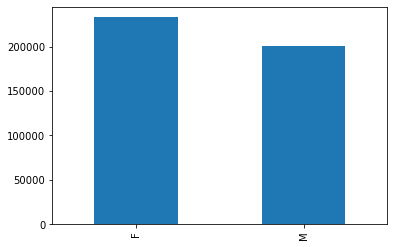

In [37]:
data.TP_SEXO.value_counts().plot(kind = 'bar')

In [71]:
data[['NT_GER','NT_FG', 'NT_CE']].describe()

,NT_GER,NT_FG,NT_CE
count,390138.0,390138.0,390138.0
unique,1504.0,1251.0,1638.0
top,38.3,25.7,29.8
freq,1031.0,7474.0,2626.0


In [45]:
data['CATEGORIA'] = ''
data.loc[data.CO_CATEGAD.isin([118,120,121,10005,10007,10008,10009,17634]), 'CATEGORIA'] = 'Privado'

In [46]:
data.loc[data.CO_CATEGAD.isin([93,115,116,10001, 10002, 10005]), 'CATEGORIA'] = 'Publico'

In [70]:
data.CATEGORIA.value_counts() / data.shape[0]

Publico    0.617441
Privado    0.362690
           0.019870
Name: CATEGORIA, dtype: float64

In [49]:
data['CO_MODALIDADE'] = data.CO_MODALIDADE.replace({0:'EaD', 1:'Presencial'})

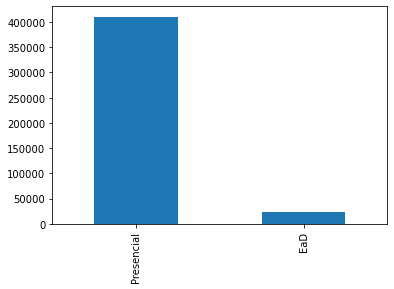

In [51]:
data.CO_MODALIDADE.value_counts().plot(kind='bar')

In [61]:
data['REGIAO'] = data['co_regiao_curso'] = data.CO_REGIAO_CURSO.replace({
    1:'Norte',
    2:'Nordeste',
    3:'Sudeste',
    4:'Sul', 
    5:'Centro-Oeste'
})

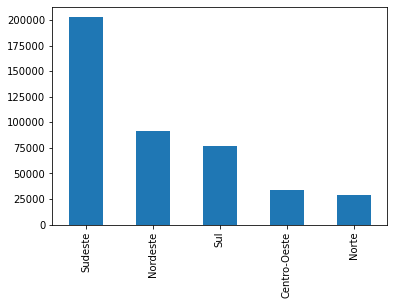

In [62]:
data.REGIAO.value_counts().plot(kind = 'bar')

In [56]:
data['RACA'] = data.QE_I02.replace({
    'A':'branca',
    'B':'preta',
    'C':'amarela',
    'D':'parda',
    'E':'indigena',
    'F': pd.NA,
    '':pd.NA
    
})

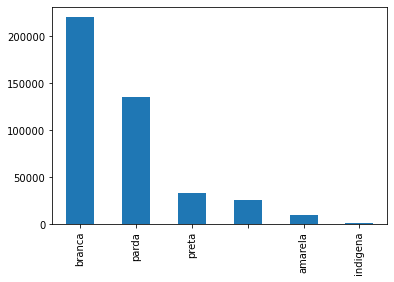

In [57]:
data.RACA.value_counts().plot(kind='bar')

In [79]:
#Média da nota do componente específico dos alunos do RGS de 
#cursos de Engenharia elétrica

data.loc[
    (data.CO_UF_CURSO == 43)&(data.CO_GRUPO == 5806), 'NT_CE'
].mean()

34.79692671394829